<h1>Calculating the grounded extensions of a graph using Matrices</h1>

We assume a that arguments attack relations are given in matrix form, in the form of a confusion matrix. We'll start by creating the matrix form of the argument graph below:

In [47]:
import numpy as np
import pandas as pd

In [48]:
dungGraph = np.array([[0,0,1], [1,0,0], [0,0,0]])

In [49]:
dungGraph

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 0]])

In [50]:
sumArgs = dungGraph.sum(axis=0)

In [51]:
inArgs = np.argwhere(sumArgs == 0)
inArgs = (inArgs.tolist())
inArgs = [i[0] for i in inArgs]
print(inArgs)

[1]


In [52]:
a = dungGraph[inArgs, :]
print(a)

[[1 0 0]]


In [53]:
outs = (np.unique(np.where(a>0)[1])).tolist()
print(outs)

[0]


<h3>Function for Calculating the In and Out Arguments of a Single Iteration</h3>

In [54]:
def getInOutArgs(argMtx):
    sumArgs = argMtx.sum(axis=0)
    
    inArgs = np.argwhere(sumArgs == 0)
    inArgs = (inArgs.tolist())
    inArgs = [i[0] for i in inArgs]
    
    attacked = argMtx[inArgs, :]
    
    outArgs = (np.unique(np.where(attacked>0)[1])).tolist()
    
    return inArgs, outArgs

<h3>Complete Function for Calculating the Grounded Extension</h3>

In [55]:
def calculateGroundedExtension(argMtx):
    argTypes = np.array(range(0, argMtx.shape[0]))
    ext = []
    terminate = False

    while not terminate:
        inArgs, outArgs = getInOutArgs(argMtx)

        if len(inArgs) > 0:
            ext.extend(list(argTypes[inArgs]))
            argsDelete = inArgs + outArgs
            argMtx = np.delete(argMtx, argsDelete, axis = 0)
            argMtx = np.delete(argMtx, argsDelete, axis = 1)
            argTypes = np.delete(argTypes, argsDelete)

        else:
            break

        sums = np.sum(argMtx.sum(axis=0))
        
        # If we find that the resulting graph (having deleted current in and out args) is got no more attacks in it then add 
        # whatever is leftover to the extension
        if sums == 0:
            ext.extend(list(argTypes))
            terminate = True
        
    return ext

argMtx = np.array([[0,1], [1,0]])
print(calculateGroundedExtension(argMtx))

[]


In [56]:
argMtx = np.array([[0,0,1], [1,0,0], [0,0,0]])
argTypes = np.array(range(0, argMtx.shape[0]))

ext = []
terminate = False

while not terminate:
    inArgs, outArgs = getInOutArgs(argMtx)
    
    if len(inArgs) > 0:
        ext.extend(list(argTypes[inArgs]))
        argsDelete = inArgs + outArgs
        argMtx = np.delete(argMtx, argsDelete, axis = 0)
        argMtx = np.delete(argMtx, argsDelete, axis = 1)
        argTypes = np.delete(argTypes, argsDelete)
        
    else:
        break
    
    sums = np.sum(dungGraph.sum(axis=0))
    terminate = (sums == 0)
        

print('extension')
print(ext)
    

extension
[1, 2]


<h1>Generating All Attack Relations Given a Review and Rating</h1>


In [57]:
allPermutations = np.array(list(itertools.product([0,1], repeat=nargs*nargs)))


circularAttacks = (np.arange(0, nargs*nargs, nargs+1)).tolist()

samePolarityAttacks = []
posList = list(itertools.permutations(posArgs, 2))
negList = list(itertools.permutations(negArgs, 2))
totList = posList + negList

for l in totList:
    ptn = ((l[0]+1)*nargs)- ((nargs+1) - l[1]) + 1 # All the odd +1 are to account for the shift in 0 index
    print('ptn')
    print(l)
    print(ptn)
    samePolarityAttacks.append(ptn)

    
graphsToDelete = np.unique([circularAttacks + samePolarityAttacks])

print(graphsToDelete)
subGraphs = allPermutations[:,graphsToDelete]
cutDownGraphs = np.delete(allPermutations, (np.where(subGraphs>0)[0]).tolist(), axis = 0)

print(cutDownGraphs)

NameError: name 'nargs' is not defined

In [ ]:
first = cutDownGraphs[3]
print(first)

In [71]:
import numpy as np
import itertools

def generatePermutations(posArgs, negArgs):

    from itertools import product, chain

    posPerms = np.array(list(itertools.product([0,1], repeat=len(posArgs)*len(negArgs))))
    negPerms = np.array(list(itertools.product([0,1], repeat=len(negArgs)*len(posArgs))))

    allPermsList = [list(chain(*i)) for i in product(posPerms, negPerms)]

    posIdxs = []
    negIdxs = []

    currPos = 0
    for x in range(len(posArgs)):
        start = currPos + len(posArgs)
        posIdxs.extend(range(start, start + len(negArgs)))
        currPos += (len(posArgs) + len(negArgs))


    currNeg = len(posArgs)*(len(posArgs) + len(negArgs))
    for x in range(len(negArgs)):
        start = currNeg
        negIdxs.extend(range(start, start + len(posArgs)))
        currNeg += (len(posArgs) + len(negArgs))

    allPerms = np.zeros(shape=(len(allPermsList), (len(posArgs)+len(negArgs))**2))
    allPermsList = np.array(allPermsList)

    allPerms[:,posIdxs] = allPermsList[:,0:(len(posArgs)*len(negArgs))]
    allPerms[:,negIdxs] = allPermsList[:,(len(posArgs)*len(negArgs)):]

    return allPerms

<h3>Convert Each Member of CutDown into an Attack Matrix</h3>

In [59]:
attackMatrix = np.vstack( np.array_split(np.array(first), nargs))
print(attackMatrix)

NameError: name 'first' is not defined

<h3>Iterate Over Each Permutation and See Grounded Ext</h3>

We are checking to see that the grounded extension of each graph matches our ideal grounded extension. If we want we can change this criteria to say that the grounded extension of each graph should be a subset of the ideal grounded extension. This way it means that we allow some arguments to be attacked. Meaning arguments of the same set do not defend eachother all the time

In [ ]:
acceptedGraphs = []

for graph in cutDownGraphs:
    attMtx = np.vstack( np.array_split(np.array(graph), nargs))
    ext = calculateGroundedExtension(attMtx)
    if set(groundedExtension) == set(ext): 
        acceptedGraphs.append(graph.tolist())    

In [ ]:
acceptedGraphs = np.array(acceptedGraphs)

sumOfAttacks = (acceptedGraphs).sum(axis=0)
print(np.vstack( np.array_split(np.array(sumOfAttacks), nargs)))

In [ ]:
normalisedAttcks = sumOfAttacks / acceptedGraphs.shape[0]
print(normalisedAttcks)

<h3>Function for Calculating Normalised Distribution</h3>

In [79]:
def calculateProbabilityDistribution(posArgs, negArgs, rating):
    
    nargs = len(posArgs + negArgs)
    allPermutations = generatePermutations(posArgs, negArgs)
    
    # Determine the Polarity of the Post
    if rating < 5:
        groundedExtension = negArgs
    elif rating > 6:
        groundedExtension = posArgs
    else:
        groundedExtension = []
    

    # Iterate over the set of graphs that are possible (excluding circular attacks and same polarity attacks) to see which one's 
    # have a grounded extension matching the polarti
    acceptedGraphs = []
    for graph in allPermutations:
        attMtx = np.vstack( np.array_split(np.array(graph), nargs))
        ext = calculateGroundedExtension(attMtx)
        if set(groundedExtension) == set(ext): 
            acceptedGraphs.append(graph.tolist()) 
        
    # Aggregate then normalise the complete set of Attacks
    acceptedGraphs = np.array(acceptedGraphs)
    sumOfAttacks = (acceptedGraphs).sum(axis=0)
    normalisedAttcks = sumOfAttacks / acceptedGraphs.shape[0]
    
    return normalisedAttcks


<h1>Generating Artificial Data</h1>

We will generate a bunch of artificial data to test our pipeline with

In [82]:
highestRating = 10
noArgsTypes = 6
positiveArgTypes = [0,1,2]
negativeArgTypes = [3,4,5]
noPosts = 5

randomReviews = np.random.randint(noArgsTypes, size=(noPosts,4))
randomRatings = np.random.randint(highestRating, size=(noPosts,1))

globalGraph = np.zeros(noArgsTypes*noArgsTypes)

<h3>Calculating Normal Distributions for Each Review</h3>

In [83]:
for idx, review in enumerate(randomReviews):
    
    posArgs = list(set(positiveArgTypes).intersection(review.tolist()))
    #print('posArgs: ', posArgs)
    negArgs = list(set(negativeArgTypes).intersection(review.tolist()))
    #print('negArgs: ', negArgs)
    posArgsIdx = list(range(0,len(posArgs)))
    negArgsIdx = list(range(len(posArgs), len(posArgs)+len(negArgs)))
    
    nmlDstb = calculateProbabilityDistribution(posArgsIdx, negArgsIdx, randomRatings[idx])
    print(nmlDstb)
    globalContribution = np.zeros(noArgsTypes*noArgsTypes)
    
    noOfArgTypesFound = len(list(posArgs+negArgs))
    
    allAttacks = list(itertools.product(list(posArgs+negArgs), repeat=2))
    allAttacksIdx = []
    for attack in allAttacks:
        ptn = ((attack[0]+1)*noArgsTypes)- ((noArgsTypes+1) - attack[1])
        allAttacksIdx.append(ptn)
    
    globalContribution[allAttacksIdx] = nmlDstb
    
    globalGraph = np.add(globalGraph, globalContribution)
    
 
print('-----------------------------------------------------------------')
print(globalGraph)

[ 0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.          1.          1.          0.66666667  0.          0.
  0.66666667  0.          0.        ]
nan
[ 0.          0.          0.70731707  0.70731707  0.          0.
  0.70731707  0.70731707  0.24390244  0.24390244  0.          0.
  0.24390244  0.24390244  0.          0.        ]
[ 0.          0.28571429  0.28571429  0.71428571  0.          0.
  0.71428571  0.          0.        ]
-----------------------------------------------------------------
[ 0.          0.          1.28571429  0.70731707  1.99303136  0.          0.
  0.          0.          0.          0.          0.          0.
         nan  1.          1.70731707  1.70731707  1.38095238  0.          0.
  0.          0.          0.          0.24390244  0.          0.24390244
  0.          0.          0.          1.62485482  0.          0.24390244
  0.          0.          0.          0.        ]


<h1>Testing with annotated Data</h1>

Next we will see what the weighted graph looks like when we use the annotation provided by a single annotator. We use a hundred posts, and have 6 possible argument types

In [178]:
import json

highestRating = 10
positiveArgTypes = [0,3,5]
negativeArgTypes = [1,2,4]
noArgsTypes = len(positiveArgTypes) + len(negativeArgTypes)


# Collect the annotation data into a numpy array
annotatedPosts = []
numericalsRatings = []

with open('allAnnotationsChutesRun1.json') as data_file:
    with open('ForumPosts.json') as ratings_file:
        data = json.load(data_file)
        

        ratings = json.load(ratings_file)
        
        for idx, d in enumerate(data):
            # We get 'Nones' sometimes when things left completeley blank. Replace with 0's so as not to interfere
            # with our sums whilst letting us keep track of noOfSentences per post
            d = [[0, 0, 0, 0, 0, 0, 0] if v is None else v for v in d] 

            d = np.array(d)
            sums = d.sum(axis=0)
            sums = np.argwhere(sums > 0)
            sums = sums[sums !=6]
            annotatedPosts.append(sums.tolist())
            
            numericalsRatings.append(ratings[idx]['Rating'])


annotatedPosts = np.array(annotatedPosts)
numericalsRatings = np.array(numericalsRatings)


# Begin generating the distributions per post 
globalGraph = np.zeros(noArgsTypes*noArgsTypes)

for idx, review in enumerate(annotatedPosts):
    
    posArgs = list(set(positiveArgTypes).intersection(review))
    print('posArgs: ', posArgs)
    negArgs = list(set(negativeArgTypes).intersection(review))
    print('negArgs: ', negArgs)
    posArgsIdx = list(range(0,len(posArgs)))
    negArgsIdx = list(range(len(posArgs), len(posArgs)+len(negArgs)))
    print('rating: ', numericalsRatings[idx])

    nmlDstb = calculateProbabilityDistribution(posArgsIdx, negArgsIdx, numericalsRatings[idx])
    print(nmlDstb)
    globalContribution = np.zeros(noArgsTypes*noArgsTypes)
    
    noOfArgTypesFound = len(list(posArgs+negArgs))
    
    allAttacks = list(itertools.product(list(posArgs+negArgs), repeat=2))
    allAttacksIdx = []
    for attack in allAttacks:
        ptn = ((attack[0]+1)*noArgsTypes)- ((noArgsTypes+1) - attack[1])+1
        allAttacksIdx.append(ptn)
    
    print('atidx',allAttacksIdx)
    globalContribution[allAttacksIdx] = nmlDstb
    print('globalcnt', globalContribution)
    
    if(np.isnan(globalContribution).any()):
        print('nan returned')
        continue
    
    globalGraph = np.add(globalGraph, globalContribution)
    #print(globalGraph)
 
print('-----------------------------------------------------------------')
globalGraphMtxForm = np.vstack( np.array_split(np.array(globalGraph), noArgsTypes))
print(globalGraphMtxForm)

        

posArgs:  [0]
negArgs:  [2, 4]
rating:  7
[ 0.  1.  1.  0.  0.  0.  0.  0.  0.]
atidx [0, 2, 4, 12, 14, 16, 24, 26, 28]
globalcnt [ 0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
posArgs:  [0, 5]
negArgs:  [2]
rating:  6
[ 0.          0.          0.66666667  0.          0.          0.66666667
  1.          1.          0.        ]
atidx [0, 5, 2, 30, 35, 32, 12, 17, 14]
globalcnt [ 0.          0.          0.66666667  0.          0.          0.          0.
  0.          0.          0.          0.          0.          1.          0.
  0.          0.          0.          1.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.66666667  0.          0.
  0.        ]
posArgs:  []
negArgs:  [2, 4]
rating:  4
[ 0.  0.  0.  0.]
atidx [14, 16, 26, 28]
globalcnt [ 0.  0.  0.  0.  0.  0.  0. 

In [145]:
for (x,y), value in np.ndenumerate(globalGraphMtxForm):
    print((x,y), ':', value)
            

(0, 0) : 0.0
(0, 1) : 8.0754456117
(0, 2) : 18.1282126645
(0, 3) : 0.0
(0, 4) : 3.08241425282
(0, 5) : 0.0
(1, 0) : 4.47069168824
(1, 1) : 0.0
(1, 2) : 0.0
(1, 3) : 0.224215246637
(1, 4) : 0.0
(1, 5) : 2.29409548922
(2, 0) : 7.08459130213
(2, 1) : 0.0
(2, 2) : 0.0
(2, 3) : 1.26668628911
(2, 4) : 0.0
(2, 5) : 7.19370938883
(3, 0) : 0.0
(3, 1) : 0.704035874439
(3, 2) : 2.66156483197
(3, 3) : 0.0
(3, 4) : 0.704035874439
(3, 5) : 0.0
(4, 0) : 0.845836868258
(4, 1) : 0.0
(4, 2) : 0.0
(4, 3) : 0.224215246637
(4, 4) : 0.0
(4, 5) : 0.621621621622
(5, 0) : 0.0
(5, 1) : 1.65712402298
(5, 2) : 12.42417679
(5, 3) : 0.0
(5, 4) : 0.378378378378
(5, 5) : 0.0


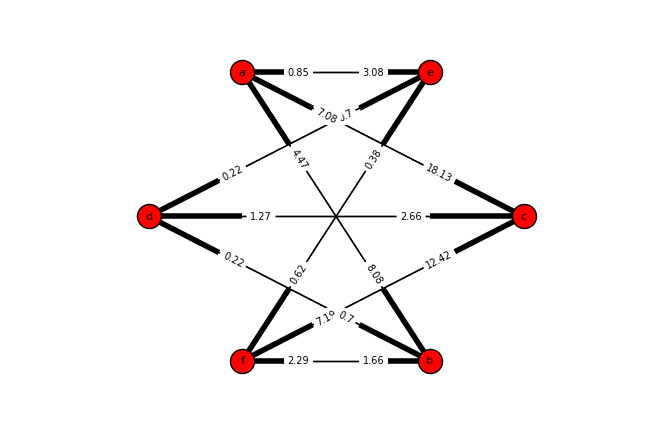

In [177]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
import string

G = nx.DiGraph()
letters = list(string.ascii_lowercase) # Will fail if we have more arguments than the number of letters in the alphabet
nodesNames = letters[0:globalGraphMtxForm.shape[0]] 

for (r,c), weight in np.ndenumerate(globalGraphMtxForm):
    if weight == 0:
        continue
    G.add_edge(nodesNames[r], nodesNames[c], length = round(weight,2))
 
#pos = nx.spring_layout(G,scale=5)
pos = nx.circular_layout(G, scale=5)
nx.draw(G, pos)
edge_labels=dict([((u,v,),d['length'])
             for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3, font_size=7)

labels = {}
for node in nodesNames:
    labels[node] = node

nx.draw_networkx_labels(G,pos,labels,font_size=8)


plt.show()



<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Node Label</th>
    <th>Argument Type</th>
  </tr>
  <tr>
    <td>a</td>
    <td>Positive Argument</td>
  </tr>
  <tr>
    <td>b</td>
    <td>Negative Arguments</td>
  </tr>
  <tr>
    <td>c</td>
    <td>Side Effects Present</td>
  </tr>
  <tr>
    <td>d</td>
    <td>No Side Effects</td>
  </tr>
  <tr>
    <td>e</td>
    <td>Side Effects Painful</td>
  </tr>
  <tr>
    <td>f</td>
    <td>Bearable Side Effects</td>
  </tr>
</table>

</body>
</html>
